## 1. Quantum many-body scars

Quantum many-body scars are analogous to the phenomenon of classical scars in single-particle quantum chaos, where scars represent a concentration of some eigenfunctions along the trajectory of classical periodic orbits. In the quantum many-body case, [Néel](https://en.wikipedia.org/wiki/Antiferromagnetism) states on bipartite lattices happen to have a large overlap with a specific subset of the Hilbert space known as scar states. Under the time evolution by Rydberg Hamiltonian, an initial Néel state undergoes a trajectory that displays coherent periodic orbits through the scar states, passing by its degenerate pair and back. This non-ergodic behavior challenges standard scenarios that expect non-eigenstates to thermalize - i.e. distribute themselves broadly through the Hilbert space - under time evolution. See for example, the [eigenstate thermalization hypothesis](https://en.wikipedia.org/wiki/Eigenstate_thermalization_hypothesis). Many-body quantum scars can be demonstrated via persistent revivals of a Rydberg density pattern.

In this section, we will learn more about many-body scars and use this phenomenon to motivate studies of quantum dynamics post-state-preaparation.

### 1a. Many-body quantum scars: ideal vs Rydberg case

Many body-scars were surprisingly discovered while running dynamics [experiments](https://arxiv.org/pdf/1707.04344) with early neutral-atom quantum computers. Subsequent theoretical explorations connected the phenomenon with quantum dynamics in constrained Hilbert spaces whose dimension grows with the number of qubits following the Fibonacci sequency.

Such constrained dynamics is most perfectly demonstrated via the so-called PXP Hamiltonian,

$$
H_{PXP} = \sum_{i=1}^N \hat{P}_i \hat{X}_{i+1}\hat{P}_{i+2}.
$$
Here, qubits are assumed to live in a *linear chain* with N sites, with $\hat{X}_i$ is the Pauli-x operator on site $i$, and $\hat{P}_i=(1-\hat{Z}_i)/2$ is a projector operator, with $\hat{Z}_i$ the Pauli-z operator. 

*At first sight, this Hamiltonian corresponds to just a odd-looking Rabi term, but the projectors introduce effective interactions via constraints. As per our usual Rabi term, this Hamiltonian will cause dynamics, but the projectors to the left and to the right of the bit-flip operator enforce that all dynamics lives inside a first-neighbor blockaded subspace (in the sense of our usual Rydberg blockade!).*

What is the exact relation between the Rydberg Hamiltonian and the PXP Hamiltonian? Let's use this question as an exercise to study problem mapping. First, the first neighbor projectors suggest it is convenient to separate the terms of the Rydberg Hamiltonian as follows:


\begin{align}
\frac{\mathcal{H}(t)}{\hbar} = & \sum_i \frac{\Omega(t)}{2} \hat{X}_{i}  + \sum_{i} V_{i,i+1} \hat{n}_i \hat{n}_{i+1} \\
                               & - \sum_i \Delta(t) \hat{n}_{i+1} + \sum_{i}^N\sum_{j=i+2}^N V_{i,j} \hat{n}_i \hat{n}_j, \nonumber
\end{align}
where we have identified $\hat{X}_i = | g_i \rangle  \langle r_i | +  | r_i \rangle  \langle g_i |$. Picking a maximum value for the Rabi term such that $\Omega < V_{i,i+1}=C_6/a^6$, where $a$ is the lattice constant, we induce a first-neighbor Rydberg blockade constraint. Thus, between the first two terms above, we recover an *approximated* PXP Hamiltonian.

*Exercise 1:* an exact mapping of the Ryberg Hamiltonian Rabi and first-neighbor interaction terms into the PXP Hamiltonian would require $V_{i,i+1}$ to be de-facto infinite with respect to the maximum $\Omega$. What kind of corrections are expected in the evolution of a Néel state, due to the fact that the interaction between sites $i$ and $i+1$ are finite? 

The terms in the second line of equation (1) are also not part of the PXP Hamiltonian: we don't want to see any bias $\Delta$ nor contributions from the Rydberg tails. Naively, one would try to improve this situation by taking $\Delta=0$ throughout. Yet, [experiments and a deeper analysis](https://arxiv.org/pdf/2012.12276) suggest a better way. Converting $\hat{n}_i=(1-\hat{Z}_i)/2$, we can rewrite the second line of equation (1) as

$$
- \sum_i \Delta(t) \hat{n}_{i+1} + \sum_{i}^N\sum_{j=i+2}^N V_{i,j} \hat{n}_i \hat{n}_j = \sum_i^N \frac{\left(\Delta(t)-\sum_{j=i+2}^N V_{ij}\right)}{2}\hat{Z}_i+\sum_i^N\sum_{j=i+2}^N \frac{V_{ij}}{4} \hat{Z}_i \hat{Z}_j + const.
$$
Thus, setting $\Delta_{opt}=\sum_{j=i+2}^N V_{ij}$ cancels a whole effective field seen by a $\hat{Z}_i$ spin, leaving us with a constant - which does not affect the evolution of our states - and a weaker (by a factor of 4) interaction term between the spins. This choice proves to be the optimal value for the detuning during scar evolutions under the Rydberg Hamiltonian.

*Exercise 2:* quantum many-body scars have been verified in any 2D bipartite lattice. For these more general lattices, how is the optimal detuning $\Delta_{opt}$ defined?


### 1b. Multi-qubit Blockaded Rabi Oscillations

we will show you how to compose geometries with pulse sequences to perform multi-qubit blockaded Rabi oscillations. In short, we can use the Rydberg blockade to change the effective Rabi frequency of the entire system by adding more atoms to the cluster.

In [17]:
from bloqade import start, save, load, var
from bloqade.atom_arrangement import Chain, Square
import numpy as np
import matplotlib.pyplot as plt

from bokeh.io import output_notebook
output_notebook() # enable interactive plots in Jupyter

import os

if not os.path.isdir("data"):
    os.mkdir("data")

Loading BokehJS ...

We will start by defining the geometry of the atoms. The idea here is to cluster the atoms so that they are all blockaded from each other. Using a combination of the Chain and Square classes, as a base, one can add additional atoms to the geometry using the add_position method. This method takes a list of tuples, or a single tuple, of the form (x,y) where x and y are the coordinates of the atom in units of the lattice constant.

In [2]:

distance = 4.0
inv_sqrt_2_rounded = 2.6

geometries = {
    1: Chain(1),
    2: Chain(2, lattice_spacing=distance),
    3: start.add_position(
        [(-inv_sqrt_2_rounded, 0.0), (inv_sqrt_2_rounded, 0.0), (0, distance)]
    ),
    4: Square(2, lattice_spacing=distance),
    7: start.add_position(
        [
            (0, 0),
            (distance, 0),
            (-0.5 * distance, distance),
            (0.5 * distance, distance),
            (1.5 * distance, distance),
            (0, 2 * distance),
            (distance, 2 * distance),
        ]
    ),
}

Next, we will define the pulse sequence. We start from the start object, which is an empty list of atom locations. In this case, we do not need atoms to build the pulse sequence, but to extract the sequence, we need to call the parse_sequence method. This creates a Sequence object that we can apply to multiple geometries.



In [3]:
sequence = start.rydberg.rabi.amplitude.uniform.piecewise_linear(
    durations=["ramp_time", "run_time", "ramp_time"],
    values=[0.0, "rabi_drive", "rabi_drive", 0.0],
).parse_sequence()

Now, all that is left to do is to compose the geometry and the Pulse sequence into a fully defined program. We can do this by calling the apply method on the geometry and passing in the sequence. This method will return an object that can then be assigned parameters.

First, we emulate the dynamics for 7 atoms, and later compare with that of smaller number of atoms. 

In [4]:
batch = (
    geometries[7]
    .apply(sequence)
    .assign(ramp_time=0.06, rabi_drive=5)
    .batch_assign(run_time=0.05 * np.arange(21))
)

We run the program on the emulator and save the results to a file so we can use them later.

In [5]:

emu_filename = os.path.join(
    os.path.abspath(""), "data", "multi-qubit-blockaded-emulation.json"
)

if not os.path.isfile(emu_filename):
    emu_batch = batch.bloqade.python().run(10000, interaction_picture=True)
    save(emu_batch, emu_filename)


We load the results from the file and plot the results. 

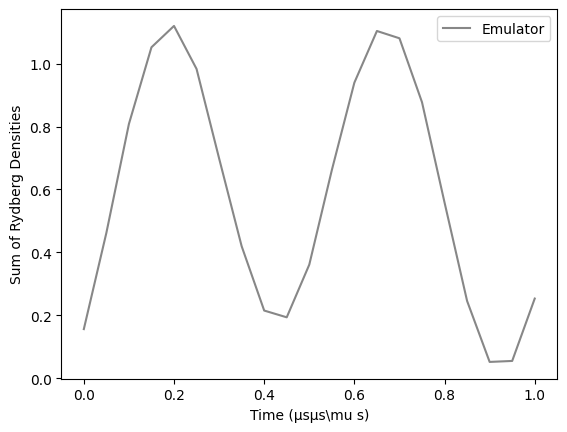

In [6]:

emu_report = emu_batch.report()
emu_densities = emu_report.rydberg_densities()
emu_densities_summed = emu_densities.sum(axis=1)
emu_run_times = emu_report.list_param("run_time")

fig, ax = plt.subplots()
ax.set_xlabel("Time")
ax.set_ylabel("Sum of Rydberg Densities")
# emulation
ax.plot(emu_run_times, emu_densities_summed, label="Emulator", color="#878787")
ax.legend()
ax.set_xlabel("Time (μsμs\mu s)")
ax.set_ylabel("Sum of Rydberg Densities")
plt.show()

To compare, we now emulate the results for the case of 3 atoms.  We see that Rabi frequency becomes smaller. 

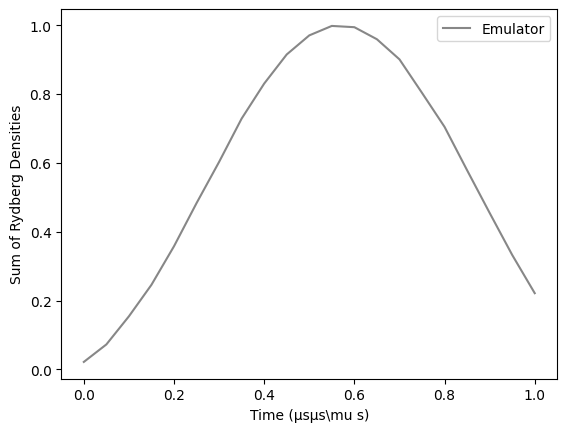

In [11]:
batch_1 = (
    geometries[1]
    .apply(sequence)
    .assign(ramp_time=0.06, rabi_drive=5)
    .batch_assign(run_time=0.05 * np.arange(21))
)

emu_filename_1 = os.path.join(
    os.path.abspath(""), "data", "multi-qubit-blockaded-emulation_1.json"
)

if not os.path.isfile(emu_filename_1):
    emu_batch_1 = batch_1.bloqade.python().run(10000, interaction_picture=True)
    save(emu_batch_1, emu_filename_1)

emu_report_1 = emu_batch_1.report()
emu_densities_1 = emu_report_1.rydberg_densities()
emu_densities_summed_1 = emu_densities_1.sum(axis=1)
emu_run_times_1 = emu_report_1.list_param("run_time")

fig, ax = plt.subplots()
ax.set_xlabel("Time")
ax.set_ylabel("Sum of Rydberg Densities")
# emulation
ax.plot(emu_run_times_1, emu_densities_summed_1, label="Emulator", color="#878787")
ax.legend()
ax.set_xlabel("Time (μsμs\mu s)")
ax.set_ylabel("Sum of Rydberg Densities")
plt.show()



### 1c. Quantum Many-body Scar Dynamics



Now we learn how to use Bloqade to run a quantum scar dynamics experiment. The protocol is as follows: We first prepare the atoms in a Z2 state using an adiabatic sweep. We then apply a Rabi pulse to the atoms, which will cause the atoms to oscillate but because of the Blockade effect, the atoms will not be able to transition to the Rydberg state. However, the atoms will still oscillate between the ground and some other excited many-body states.

The idea is that first we define the full waveform we would like to apply to the atoms then after defining the full waveform you simply call the slice method to slice the that waveform stopping at a variable time run_time. This works fine for detuning but for the Rabi drive, we need to make sure that the Rabi drive is 0 at the end of the the waveform. To do this, we use the record method to record the value of the Rabi drive at the end of the waveform. We then use the linear method to append a segment to the waveform that fixes the value of the Rabi drive to 0 at the end of the waveform. Now any value of run_time will be a valid waveform that is compatible with the hardware constraints.

In [14]:
if not os.path.isdir("data"):
    os.mkdir("data")

n_atoms = 11
lattice_spacing = 6.1
run_time = var("run_time")

quantum_scar_program = (
    Chain(n_atoms, lattice_spacing=lattice_spacing)
    # define detuning waveform
    .rydberg.detuning.uniform.piecewise_linear(
        [0.3, 1.6, 0.3], [-18.8, -18.8, 16.3, 16.3]
    )
    .piecewise_linear([0.2, 1.6], [16.3, 0.0, 0.0])
    # slice the detuning waveform
    .slice(start=0, stop=run_time)
    # define rabi waveform
    .amplitude.uniform.piecewise_linear([0.3, 1.6, 0.3], [0.0, 15.7, 15.7, 0.0])
    .piecewise_linear([0.2, 1.4, 0.2], [0, 15.7, 15.7, 0])
    # slice waveform, add padding for the linear segment
    .slice(start=0, stop=run_time - 0.065)
    # record the value of the waveform at the end of the slice to "rabi_value"
    .record("rabi_value")
    # append segment to waveform that fixes the value of the waveform to 0
    # at the end of the waveform
    .linear("rabi_value", 0, 0.065)
)

Now we try to plot the waveform as below. We can clear see that both the detuning and the Rabi freency can be seperated to two parts, with the first part being the preparation and the second part being the quench dynamics after the prepartion of Z2 states.  

In [18]:
quantum_scar_program.parse_sequence().show(run_time = 4)

Now we are ready to emulate the whole dynamics at any intermediate time step. To do this we first define the batch below.

In [23]:

# get run times via the following:
prep_times = np.arange(0.2, 2.2, 0.2)
scar_times = np.arange(2.2, 4.01, 0.01)
run_times = np.unique(np.hstack((prep_times, scar_times)))
batch = quantum_scar_program.batch_assign(run_time=run_times)
emu_batch = batch.bloqade.python().run(1000)


In [24]:

def get_z2_probabilities(report):
    z2_probabilities = []

    for count in report.counts():
        z2_probability = count.get("01010101010", 0) / sum(list(count.values()))
        z2_probabilities.append(z2_probability)

    return z2_probabilities

Finally, we plot the results of the Z2 probability, and we see the oscillation of such quantity. This is a clear feature of the non-thermal dynamics of the scar.   

In [25]:
emu_report = emu_batch.report()

emu_run_times = emu_report.list_param("run_time")
emu_z2_prob = get_z2_probabilities(emu_report)

plt.plot(emu_run_times, emu_z2_prob, label="Emulator", color="#878787")

plt.legend()
plt.xlabel("Time ($\mu s$)")
plt.ylabel("Z2-state Probability")
plt.show()

BeartypeCallHintReturnViolation: Method bloqade.task.base.Report.counts() return [OrderedDict([('11111111111', 481), ('11101111111', 42), ('11111111011', 41), ('111110111...)])] violates type hint list[collections.OrderedDict[str, int]], as list index 13 item <protocol "collections.OrderedDict"> key str '01010101010' value <protocol "numpy.int64"> 747 not instance of int.